# How Much of the World Has Access to the Internet?

## 💾 The data

#### The research team compiled the following tables ([source](https://ourworldindata.org/internet)):

#### internet
- "Entity" - The name of the country, region, or group.
- "Code" - Unique id for the country (null for other entities).
- "Year" - Year from 1990 to 2019.
- "Internet_usage" -  The share of the entity's population who have used the internet in the last three months.

#### people
- "Entity" - The name of the country, region, or group.
- "Code" - Unique id for the country (null for other entities).
- "Year" - Year from 1990 to 2020.
- "Users" - The number of people who have used the internet in the last three months for that country, region, or group.

#### broadband
- "Entity" - The name of the country, region, or group.
- "Code" - Unique id for the country (null for other entities).
- "Year" - Year from 1998 to 2020.
- "Broadband_Subscriptions" - The number of fixed subscriptions to high-speed internet at downstream speeds >= 256 kbit/s for that country, region, or group.

_**Acknowledgments**: Max Roser, Hannah Ritchie, and Esteban Ortiz-Ospina (2015) - "Internet." OurWorldInData.org._

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

broadband = pd.read_csv("data/broadband.csv")
internet = pd.read_csv("data/internet.csv")
people = pd.read_csv("data/people.csv")

people.head()

,Entity,Code,Year,Users
0,Afghanistan,AFG,1990,0
1,Afghanistan,AFG,1991,0
2,Afghanistan,AFG,1992,0
3,Afghanistan,AFG,1993,0
4,Afghanistan,AFG,1994,0


## Top Countries on Internet Usage

- The top 5 countries with the highest internet usage are Bahrain, Qatar, Liechtenstein, Kuwait, and the Uniter Arab Emirates. 
- All of them have more than a 99% coverage of internet, meaning virtually every citizen in their countries have access to the internet. 
- Notably, all of the top 5 countries are relatively small in size both by population and area. It's the opposite when it comes to their GDPs per capita, as all these countries are rich relative to their population.

Given the insights, it can be concluded that a country that with a small population and area and high GDP per capita, increases their internet coverage. 

- Internet infrastructure such as cables and towers can easily be put up in a small country. Unlike an archipelago or a large country, internet service providers will have to spend more time and money.
- The top countries are all wealthy nations in which they have more than enough disposable income to provide internet access to all their nations.

<BarContainer object of 20 artists>

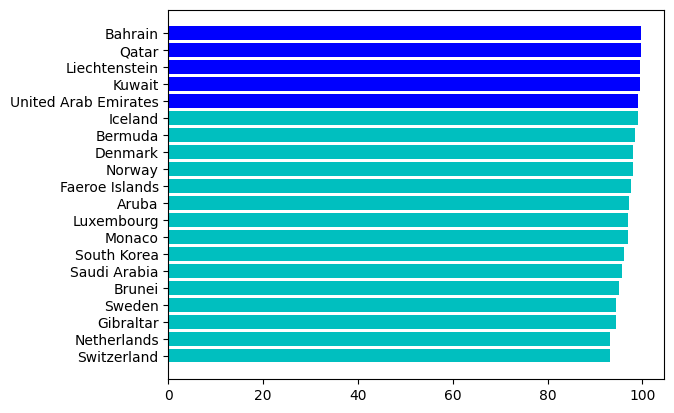

In [2]:
internet_userz = internet[internet["Entity"] != 'World'].dropna()
internet_userz.sort_values('Year', inplace=True, ascending=False)

df_users = (internet_userz.groupby(by=['Entity'], as_index=False)
      .first().sort_values(by = 'Internet_Usage', ascending = False))

top = df_users[:20].sort_values(by = 'Internet_Usage', ascending = True)

color = ['c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'b','b','b','b','b', ]

plt.barh(top['Entity'], top['Internet_Usage'], color = color)

## Internet Usage per Region

- North America and the European Union come in first and second respectively with the most internet usage compared to all other regions. There is only a small difference between the two regions.
- The regions of Latin America & Carribean and East Asia & Pacific come in second and third. With a slight difference between the two.
- South Asia, Western and Central Africa, and Eastern and Southern Africa come in fifth, sixth, and seventh respectively. With minimal differences in between.

Based on the observations, the wealthy regions have a higher internet usage. Even though the region with the third largest inernet usage, Latin America & Carribean, there is a significant difference with its top 2 counterpart. Same goes with South Asia and the African regions. Despite South Asia being next to East Asia and Pacific in the rankings, there is a significant difference between the two.

- Wealthier regions tend to have better internet coverage amongst its citizens. Having a bigger GDP also means having more resources to build internet infrastructure.
- There is inequality amongst regions with their internet coverage. Developing regions cannot allocate much of their resources to the development of internet access. Also, developing nations tend to have more corrupt governments which makes it difficult for the operations of internet service providers.

<BarContainer object of 7 artists>

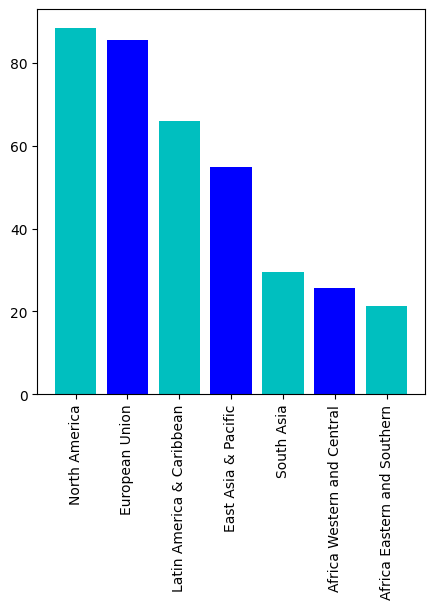

In [3]:
regions = (['Africa Eastern and Southern', 'Africa Western and Central', 
            'Latin America & Caribbean', 'East Asia & Pacific', 
            'South Asia','North America', 'European Union'])

regional = (internet[internet['Entity'].isin(regions)])

df_region = regional.sort_values('Year', inplace=True, ascending=False)
df_region = (regional.groupby(by=['Entity'], as_index=False)
      	.first().sort_values(by = 'Internet_Usage', ascending = False))

plt.figure(figsize=(5, 5))

color_1 = ['c','b']

plt.xticks(rotation= 90)
plt.bar(df_region['Entity'], df_region['Internet_Usage'], color = color_1)

## Timeline of Regional Internet Usage

- North America and the European Union had the largest and fastest growth for internet usage. From 1995 to 2000, there had been an exponential growth for internet usage in the regions.
- The regions of Latin America & Carribean and East Asia & Pacific had very similar growth of internet usage. However, the graph shows they did not exhibit a fast exponential growth.
- The regions of Easter and Southern Africa, Western and Central Africa, and South asia had the smallest amount of growth while having similar results. Amongst all regions, they had the slowest and least amount of growth.

Based on these observations, 

- The first internet connection happened in the United States. And other pioneering connections occurred in the European Union. Not only that these countries were wealthy to provide internet services to their citizens, they were also amongst the very first who did it.
- The regions of Latin America & Carribean and East Asia & Pacific are developing nations with fast GDP growths. The fast growth of their economies also contribute to additional users of the internet.
- The poorest regions of South Asia and Africa experience the slowest growth of internet usage. They are also the poorest regions with the lowest levels of income. Citizens are unable to afford fast internet therefore there is no demand, in return internet providers will not take the initiative of establishing their services to these regions.

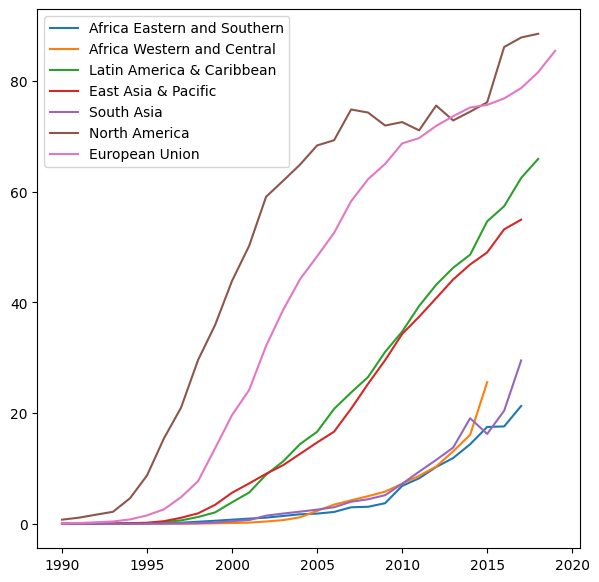

In [4]:
AES = regional[regional['Entity'] == 'Africa Eastern and Southern']
AWC = regional[regional['Entity'] == 'Africa Western and Central']
LAC = regional[regional['Entity'] == 'Latin America & Caribbean']
EAP = regional[regional['Entity'] == 'East Asia & Pacific']
SAI = regional[regional['Entity'] == 'South Asia']
NOA = regional[regional['Entity'] == 'North America']
EUN = regional[regional['Entity'] == 'European Union']

plt.figure(figsize=(7, 7))

plt.plot(AES['Year'], AES['Internet_Usage'])
plt.plot(AWC['Year'], AWC['Internet_Usage'])
plt.plot(LAC['Year'], LAC['Internet_Usage'])
plt.plot(EAP['Year'], EAP['Internet_Usage'])
plt.plot(SAI['Year'], SAI['Internet_Usage'])
plt.plot(NOA['Year'], NOA['Internet_Usage'])
plt.plot(EUN['Year'], EUN['Internet_Usage'])

plt.legend(regions)

plt.show()

## Top 5 Countries with Most Internet Users

- China has the largest poulation of internet users. And out of the 5 top countries, the United States is the only developed nation. The rest are developing nations.
- Developing nations offer an opportunity for the internet market because of their relatively large user base. Business entities can then tap into this and have access to a wide variety of consumers.

<BarContainer object of 5 artists>

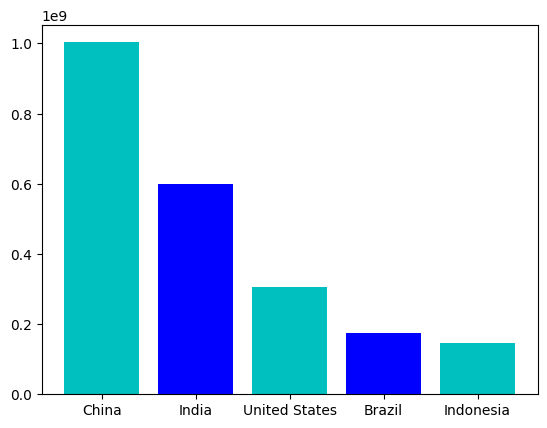

In [5]:
users_by_country_raw = people[people["Entity"] != 'World'].dropna()

users_by_country_raw.sort_values('Year', inplace=True, ascending=False)
df = (users_by_country_raw.groupby(by=['Entity'], as_index=False)
      .first().sort_values(by = 'Users', ascending = False))

top_5_users = df[:5]

plt.bar(top_5_users['Entity'], top_5_users['Users'], color = color_1)

## High Bandwidth Users and Population of Internet Users

- Out of more than 4 billion users, 600 million have access to high bandwidth internet which accounts to 14.9 percent of the overall population of internet users.
- The majority of internet users still only have access to low bandwidth interent.

Based on these observations
- The majority of the world still do not partake in internet activities that require fast speeds. This signifies that there is not yet a majority demand for high speed internet connections.

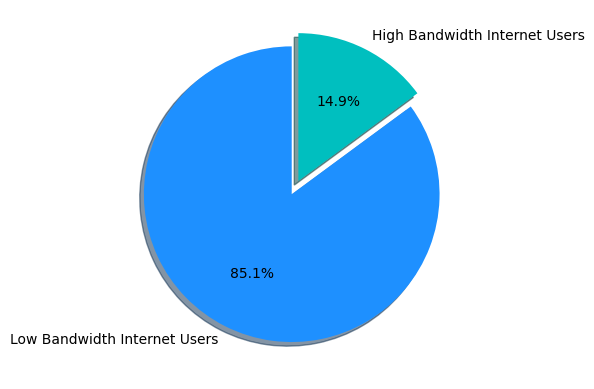

In [6]:
usage_2019 = people[people["Year"] == 2019]
usage_2019 = usage_2019[usage_2019['Entity'] == 'World']

broad_2019 = broadband[broadband['Year'] == 2019]
broad_2019 = broad_2019[broad_2019['Entity'] == 'World']

broad_users_2019 = usage_2019.merge(broad_2019, on = 'Entity')
broad_users_2019['High_Users'] = broad_users_2019.Broadband_Subscriptions * (broad_users_2019.Users) / 100

labels = 'Low Bandwidth Internet Users', 'High Bandwidth Internet Users'
userbase_worldwide = [3569458758,624624106]
explode = (0,.1)

fig1, ax1 = plt.subplots()
ax1.pie(userbase_worldwide, explode=explode, labels=labels,
        autopct='%1.1f%%',
        shadow=True, 
        startangle=90,
        colors = ['dodgerblue','c'])

plt.show()